11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1), y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1), y_test shape: (10000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 59ms/step - accuracy: 0.8644 - loss: 0.4472 - val_accuracy: 0.9774 - val_loss: 0.0671
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.9836 - loss: 0.0537 - val_accuracy: 0.9852 - val_loss: 0.0450
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9894 - loss: 0.0356 - val_accuracy: 0.9848 - val_loss: 0.0442
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9836 - val_loss: 0.0588
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.9897 - val_loss: 0.0348
313/313 - 4s - 12ms/step - accuracy: 0.9897 - loss: 0.0348
Test accuracy: 0.9897, Test loss: 0.0348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


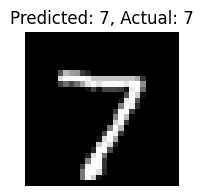

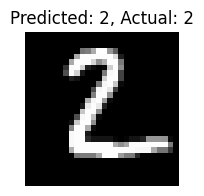

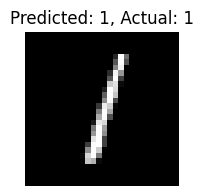

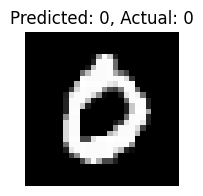

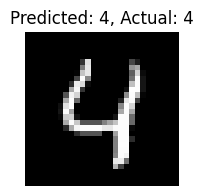

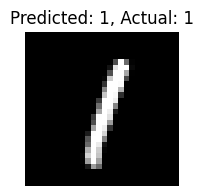

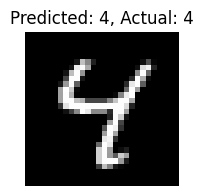

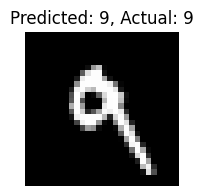

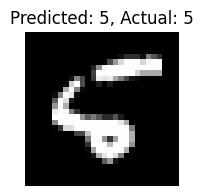

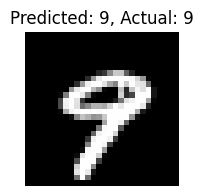

Model saved as 'digit_recognition_model.h5'


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to match the input shape of the CNN (28x28x1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Print dataset shape for verification
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}')

# Predict the first 10 test images
predictions = model.predict(x_test[:10])

# Visualize the first 10 predictions and their actual labels
for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}')
    plt.axis('off')
    plt.show()

# Save the trained model
model.save('digit_recognition_model.h5')
print("Model saved as 'digit_recognition_model.h5'")